# Basic Data analyses

## Load in the data

In [7]:
import numpy as np, sys, scipy.stats, pandas as pd, os, os.path, csv#, PythonAnalyses

import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
pd.options.display.mpl_style = 'default'

Start = 0 #if I want to reload data from csvs = 1. If i want to load python pickle == 0

filename = 'AdditionalSingleton_TargetUncertain_Runs.csv'
csvName = 'AdditionalSingleton_TargetUncertain_Runs'

if sys.platform == 'linux2': #is this my linux laptop
    path = '/home/dan-laptop/Dropbox/TargetUncertainty/Exp3'
elif sys.platform == 'darwin': #is this my mac work comp    
    path = '/Users/danvatterott/Dropbox Encore/Dropbox/TargetUncertainty/Exp3/'

os.chdir(path)

if Start == 1: #load in data from csv
    numfiles = len([name for name in os.listdir('.') if os.path.isfile(name) and name.endswith(".csv") and name[0].isdigit()])
    for partnum in xrange(1,numfiles+1): #this is a loop that goes through all participants
        filename = '%s_' % str(partnum) + csvName + '.csv'
        if partnum == 1: 
            df = pd.read_csv(filename)
        if partnum > 1: 
            df = df.append(pd.read_csv(filename))
    df.columns = map(str.lstrip, df.columns)
    df.to_pickle(csvName+'.pkl') #save this data frame all together
elif Start == 0: #load the data from a previously saved python file. should save time if not adding csv data. 
    df = pd.read_pickle(csvName+'.pkl')

In [8]:
df[0:3] #take a quick look at the dataframe. 

,TarType,TarLoc,TarColorCode,DistCond,TarDistDist,DistLoc,DistLine,Resp,Block,ConstantTar,ChangeCounter,Acc,RT,Sub#
0,1,3,2,2,1,2,1,2,0,0,1,0,1039.0328,1
1,2,3,1,1,0,0,0,1,0,0,2,0,3067.5919,1
2,2,5,2,2,2,3,2,2,0,0,3,1,1230.1895,1


SingletonCueMatch = 1 = color singleton at cued location/object
SingletonCueMatch = 2 = color singleton at uncued location/object
SingletonCueMatch = 0 = color singleton absent
BlockType = 1 = cross
BlockType = 2 = circle
BlockType = 3 = cardinal
BlockType = 4 = diagonal

## Data Trimming

data trimming. correct, slower than 300 ms and faster than 1500. 

In [9]:
Trimmer = df['Block'] > 0 #not the practice block
Trimmer2 = df['Acc'] == 1 #not an error trial
Trimmer3 = df['RT'] > 300 #not a super fast response
PartTrim = (df['Sub#'] != 8)

DistCond = df[Trimmer & Trimmer2 & Trimmer3].groupby(['DistCond','Sub#']) 
RTTrim = DistCond['RT'].mean() + 2.5*DistCond['RT'].std(ddof=0)
subList = df.drop_duplicates(subset='Sub#')
TrimmerOld = [False]*len(df)
for sub in subList['Sub#']: #loop through every subject. 
    TrimmerA = (df.DistCond == 1) & (df['RT'] < RTTrim[1][sub]) & (df['Sub#'] == sub)
    TrimmerB = (df.DistCond == 2) & (df['RT'] < RTTrim[2][sub]) & (df['Sub#'] == sub)
    Trimmer4 = [any(tup) for tup in zip(TrimmerA, TrimmerB, TrimmerOld)] #combine those 2 RT trimmers. 
    TrimmerOld = Trimmer4

In [10]:
totalTrialNum = np.size(df[PartTrim & Trimmer],0)
ex_counter = 0
Total=0
for sub in df['Sub#'].unique(): #loop through every subject. 
    TrimmerA = (df[Trimmer].DistCond == 1) & (df[Trimmer]['RT'] > RTTrim[1][sub]) & (df[Trimmer]['Sub#'] == sub) & (df[Trimmer].Acc==1)
    TrimmerB = (df[Trimmer].DistCond == 2) & (df[Trimmer]['RT'] > RTTrim[2][sub]) & (df[Trimmer]['Sub#'] == sub) & (df[Trimmer].Acc==1)
    TrimmerC = df[Trimmer]['RT'] < 300 & (df[Trimmer].Acc==1)
    Total+= (sum(TrimmerA)+sum(TrimmerB)+sum(TrimmerC))
Total = sum(TrimmerA) + sum(TrimmerB) + sum(TrimmerC)
print Total
print totalTrialNum
Rt_ex = float(Total)/float(totalTrialNum)
print '%.9f' % Rt_ex
#measuring how many trials are excluded. 

10
5760
0.001736111


checking acc. looks good. everyone above 90%

In [11]:
tableAcc = df[Trimmer].pivot_table(values='Acc', index='Sub#', aggfunc=np.mean)
tableAcc

Sub#
1     0.908854
2     0.966146
3     0.940104
4     0.950521
5     0.947917
6     0.968750
7     0.984375
8     0.882812
9     0.984375
10    0.958333
11    0.955729
12    0.968750
13    0.979167
14    0.908854
15    0.934896
16    0.960938
Name: Acc, dtype: float64

In [12]:
tableRT = df[Trimmer & Trimmer2 & Trimmer3 & Trimmer4].pivot_table(values='RT', index='Sub#', aggfunc=np.mean)
tableRT

Sub#
1     760.463287
2     608.875852
3     766.333202
4     589.946120
5     693.575033
6     656.393220
7     931.161534
8     813.083693
9     841.531879
10    571.117581
11    606.915263
12    654.725679
13    689.595730
14    586.671355
15    836.928029
16    650.852772
Name: RT, dtype: float64

## RT Data

In [13]:
DTRIM = df['DistCond'] == 1
tableRT2A = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & DTRIM].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)
DTRIM = df['DistCond'] == 2
tableRT2B = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & DTRIM].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)

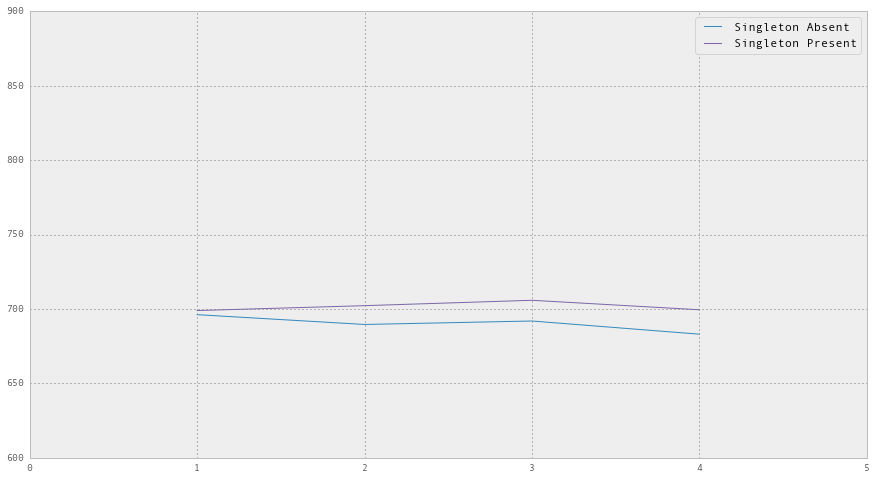

In [73]:
xdata = df['ChangeCounter'][PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].unique()

Absent  = np.mean(tableRT2A)
Present = np.mean(tableRT2B)

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)

axes.plot(xdata, Absent, label='Singleton Absent'); 
axes.plot(xdata, Present, label='Singleton Present')
axes.legend()
axes.set_ylim(600,900)
axes.set_xlim(0,5);

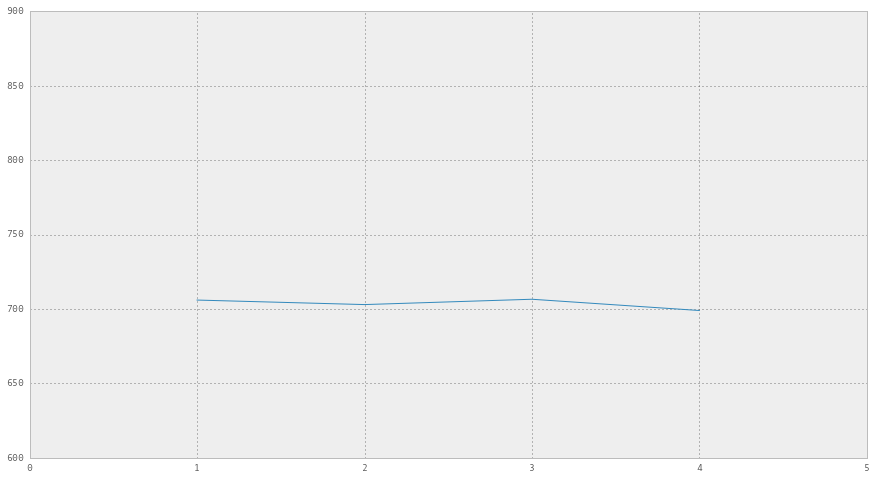

In [62]:
tableRT2 = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)

xdata = df['ChangeCounter'][PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].unique()
Absent  = [np.mean(tableRT2[1]),np.mean(tableRT2[2]),np.mean(tableRT2[3]),np.mean(tableRT2[4])]

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)

axes.plot(xdata, Absent); 
axes.legend()
axes.set_ylim(600,900)
axes.set_xlim(0,5);

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			743.49			776.57			
2			580.78			616.86			
3			776.09			771.29			
4			596.91			567.36			
5			706.48			703.54			
6			647.45			642.59			
7			911.51			938.37			
8			778.33			867.4			
9			814.52			904.53			
10			588.13			549.34			
11			571.73			594.16			
12			678.81			647.37			
13			686.13			682.38			
14			611.9			586.84			
15			880.54			844.17			
16			648.49			659.07			
mean			701.33			709.49			
STE			26.76			31.37			
----------------------------------------------------------------------------------------------------
ttest = (-0.81454974991010287, 0.42807335264220103)
n = 16


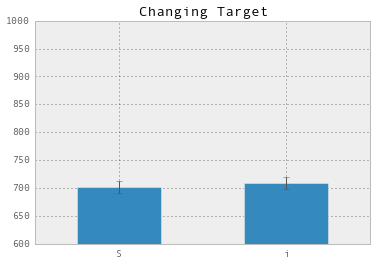

In [63]:
ConType = df['ChangeCounter'] == 1
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Changing Target')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			765.06			729.31			
2			593.84			611.29			
3			779.68			775.66			
4			574.58			621.82			
5			696.86			682.56			
6			629.09			666.11			
7			967.83			969.28			
8			797.54			831.07			
9			814.78			835.77			
10			566.26			571.09			
11			596.89			651.37			
12			627.53			666.78			
13			696.44			670.77			
14			589.99			566.47			
15			804.92			870.75			
16			640.37			644.61			
mean			696.35			710.29			
STE			28.67			28.83			
----------------------------------------------------------------------------------------------------
ttest = (-1.8279415797055887, 0.087515561985674811)
n = 16


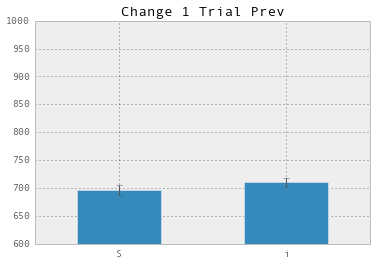

In [64]:
ConType = df['ChangeCounter'] == 2
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 1 Trial Prev')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			693.03			843.02			
2			579.34			659.73			
3			746.01			782.71			
4			580.12			596.97			
5			695.53			711.94			
6			663.85			663.88			
7			962.41			908.13			
8			775.41			824.19			
9			882.88			810.08			
10			590.62			585.32			
11			611.07			625.14			
12			652.02			645.46			
13			707.38			695.06			
14			593.02			578.77			
15			793.4			805.86			
16			628.29			675.75			
mean			697.15			713.25			
STE			27.97			25.6			
----------------------------------------------------------------------------------------------------
ttest = (-1.2416328737167686, 0.23343733722119631)
n = 16


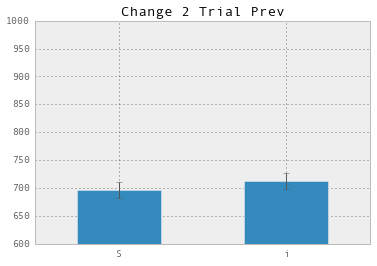

In [65]:
ConType = df['ChangeCounter'] == 3
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 2 Trial Prev')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			727.18			782.85			
2			607.75			619.51			
3			731.9			764.23			
4			584.85			603.97			
5			676.56			675.03			
6			640.28			696.41			
7			889.1			894.72			
8			818.82			804.39			
9			843.22			814.65			
10			569.48			548.86			
11			608.61			595.75			
12			650.77			670.26			
13			682.59			692.71			
14			579.16			587.27			
15			813.33			879.68			
16			641.52			666.43			
mean			691.57			706.04			
STE			25.48			26.57			
----------------------------------------------------------------------------------------------------
ttest = (-2.0761530869853169, 0.055485451117655703)
n = 16


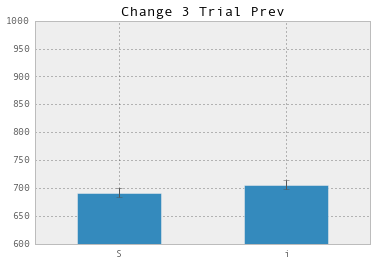

In [66]:
ConType = df['ChangeCounter'] == 4
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 3 Trial Prev')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			730.98			788.16			
2			593.86			630.9			
3			753.27			774.96			
4			579.42			606.76			
5			690.23			689.43			
6			645.53			676.9			
7			941.52			925.65			
8			796.76			819.34			
9			848.41			820.45			
10			573.95			569.77			
11			605.16			624.74			
12			643.13			661.17			
13			695.68			686.99			
14			587.39			577.73			
15			803.78			852.09			
16			636.94			662.24			
mean			695.38			710.45			
STE			27.2			26.55			
----------------------------------------------------------------------------------------------------
ttest = (-2.5161373131992133, 0.02373700601612631)
n = 16


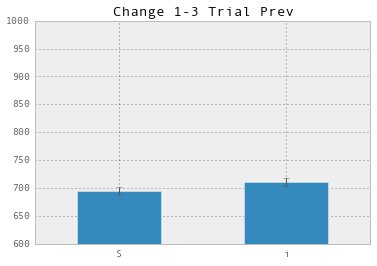

In [67]:
ConType = (df['ChangeCounter'] == 4) | (df['ChangeCounter'] == 3) | (df['ChangeCounter'] == 2)
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 1-3 Trial Prev')

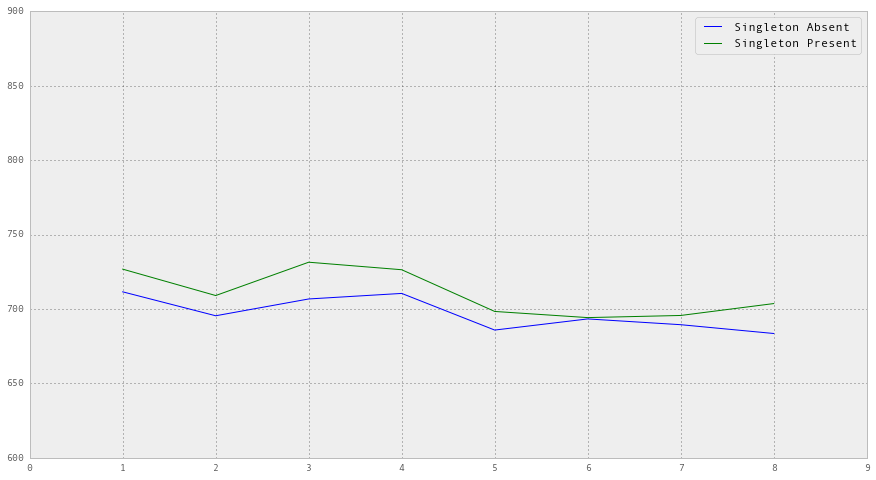

In [55]:
tableRT2 = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].pivot_table(values='RT', index='Block', columns=['DistCond'], aggfunc=np.mean)

xdata = df['Block'][PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].unique()
Absent  = tableRT2[1]
Present = tableRT2[2]

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)

axes.plot(xdata, Absent, 'blue', label='Singleton Absent'); 
axes.plot(xdata, Present, 'green', label='Singleton Present')
axes.legend()
axes.set_ylim(600,900)
axes.set_xlim(0,9);

In [16]:
ExpHalf = df['Block'] < 5
DTRIM = df['DistCond'] == 1
tableRT2A = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & DTRIM & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)
DTRIM = df['DistCond'] == 2
tableRT2B = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & DTRIM & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)
ExpHalf = df['Block'] > 4
DTRIM = df['DistCond'] == 1
tableRT2C = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & DTRIM & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)
DTRIM = df['DistCond'] == 2
tableRT2D = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & DTRIM & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['ChangeCounter'], aggfunc=np.mean)

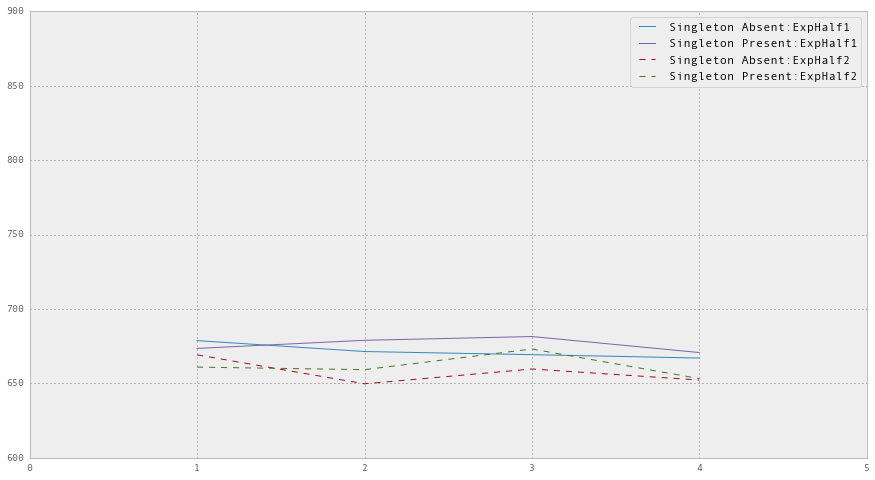

In [17]:
xdata = df['ChangeCounter'][PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4].unique()

Absent1  = np.mean(tableRT2A)
Present1 = np.mean(tableRT2B)
Absent2  = np.mean(tableRT2C)
Present2 = np.mean(tableRT2D)

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)

axes.plot(xdata, Absent1, label='Singleton Absent:ExpHalf1'); 
axes.plot(xdata, Present1, label='Singleton Present:ExpHalf1')
axes.plot(xdata, Absent2,'--', label='Singleton Absent:ExpHalf2'); 
axes.plot(xdata, Present2,'--', label='Singleton Present:ExpHalf2')
axes.legend()
axes.set_ylim(600,900)
axes.set_xlim(0,5);

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			803.82			809.54			
2			631.92			649.11			
3			805.43			808.94			
4			609.08			628.29			
5			714.66			684.61			
6			617.44			645.53			
7			961.2			961.67			
8			870.63			931.6			
9			635.22			568.68			
10			577.34			636.93			
11			627.45			651.8			
12			712.68			700.7			
13			631.4			630.9			
14			878.2			820.53			
15			636.91			696.82			
mean			714.23			721.71			
STE			30.96			30.29			
----------------------------------------------------------------------------------------------------
ttest = (-0.75004445782591422, 0.4656467623214815)
n = 15


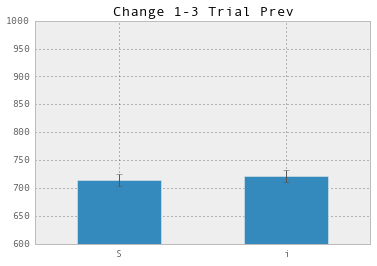

In [18]:
ExpHalf = df['Block'] < 5
ConType = (df['ChangeCounter'] == 1) | (df['ChangeCounter'] == 2)# | (df['ChangeCounter'] == 2)
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 1-3 Trial Prev')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			805.02			848.0			
2			659.18			667.56			
3			754.42			796.86			
4			637.0			644.23			
5			660.9			699.07			
6			655.07			674.55			
7			924.94			943.03			
8			894.19			857.9			
9			597.93			589.36			
10			635.95			629.24			
11			647.3			684.77			
12			728.08			751.48			
13			637.3			599.13			
14			797.28			819.1			
15			659.46			675.25			
mean			712.94			725.3			
STE			26.01			27.22			
----------------------------------------------------------------------------------------------------
ttest = (-1.8674739209698312, 0.082912413517392938)
n = 15


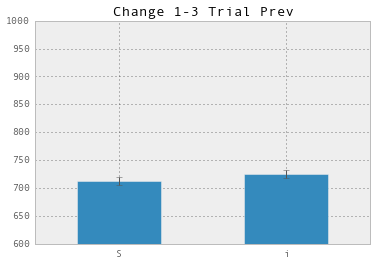

In [19]:
ExpHalf = df['Block'] < 5
ConType = (df['ChangeCounter'] == 4) | (df['ChangeCounter'] == 3)# | (df['ChangeCounter'] == 2)
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 1-3 Trial Prev')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			731.12			708.59			
2			567.07			609.58			
3			746.03			746.01			
4			589.51			592.54			
5			701.64			734.69			
6			687.88			672.41			
7			905.32			950.01			
8			772.4			823.54			
9			593.95			595.22			
10			603.26			633.56			
11			715.1			726.41			
12			682.04			660.72			
13			600.94			570.72			
14			811.43			864.97			
15			687.17			649.24			
mean			692.99			702.55			
STE			24.23			28.09			
----------------------------------------------------------------------------------------------------
ttest = (-1.1866935185492082, 0.25509615435003241)
n = 15


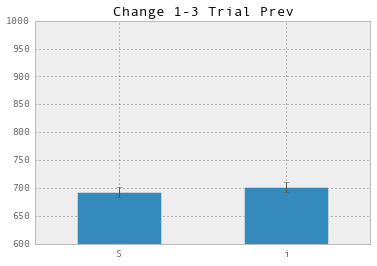

In [20]:
ExpHalf = df['Block'] > 4
ConType = (df['ChangeCounter'] == 1) | (df['ChangeCounter'] == 2)# | (df['ChangeCounter'] == 2)
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 1-3 Trial Prev')

----------------------------------------------------------------------------------------------------
Sub#			1			2			
1			669.81			775.85			
2			563.57			629.07			
3			722.79			748.56			
4			602.55			586.84			
5			748.15			699.96			
6			688.98			723.86			
7			919.9			846.72			
8			837.22			784.02			
9			624.76			559.52			
10			639.66			638.35			
11			681.61			658.0			
12			689.17			662.78			
13			581.96			614.12			
14			810.22			849.1			
15			634.91			678.36			
mean			694.35			697.01			
STE			25.71			23.07			
----------------------------------------------------------------------------------------------------
ttest = (-0.19755853692214057, 0.84623012370577866)
n = 15


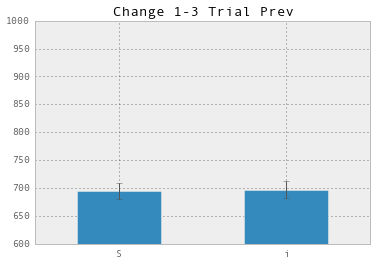

In [21]:
ExpHalf = df['Block'] > 4
ConType = (df['ChangeCounter'] == 4) | (df['ChangeCounter'] == 3)# | (df['ChangeCounter'] == 2)
tableRT = df[PartTrim & Trimmer & Trimmer2 & Trimmer3 & Trimmer4 & ConType & ExpHalf].pivot_table(values='RT', index='Sub#', columns=['DistCond'], aggfunc=np.mean)
PythonAnalyses.dataTableRT(tableRT)

PythonAnalyses.Test_and_Plot_PairwiseComparison(tableRT, 600, 1000, 'Singleton Condition','Change 1-3 Trial Prev')